# Millikan
Fred Järv

#### Millikani õlitilga katse eesmärk on näidata, et elektrilaeng ei ole suvaline pidev suurus, vaid esineb kindlate väärtustena elementaarlaengu korrutises. Katse põhineb õlitilga liikumise vaatlemisel õhus nii vabalangel kui ka elektriväljas. Kui õlitilk pihustatakse mõõtekambrisse, saavad mõned tilgad hõõrdumise ja ionisatsiooni tõttu elektrilaengu. Tilk hakkab õhus alla langema, kuid kuna ta on väga väike, mõjub talle oluline takistusjõud viskoosusest, mistõttu saavutab ta üsna kiiresti püsikiiruse. Püsikiiruse kaudu on võimalik Stokesi seadust kasutades hinnata tilga raadiust a. Kui valida pinge nii, et elektrijõud tasakaalustab tilga raskusjõu  ning tilk jääb seisma, saab öelda, et jõudude summa on ligikaudu null: allapoole suunatud raskusjõud on tasakaalus ülespoole suunatud elektrijõuga. Kuna tilga raadius on juba kukkumise püsikiiruse põhjal hinnatud, saab tasakaalutingimusest arvutada tilga laengu.

Kuna ma pole eriti osav pythonis, siis lasni Chat-GPT-l koodi kirjutada.

In [89]:
import numpy as np
import pandas as pd
import math

# Konstandid
rho = 981          # kg/m^3 (õli tihedus)
g = 9.8            # m/s^2
eta = 1.83e-5      # kg/(m*s) (õhu dünaamiline viskoossus)
l = 0.0015         # m (kukkumisteekond 1.5 mm)
d = 0.005          # m (elektroodide vahe 5.0 mm)
b = 6.17e-8        # m^2·Hg
p = 0.76           # m·Hg

def arvuta_a_ja_q(V_tasakaal, t_kukkumine):
    V = abs(float(V_tasakaal))
    t = float(t_kukkumine)
    # Tilga raadius Stokesi seadusest:
    a = math.sqrt((9 * eta * l) / (2 * rho * g * t))
    q = ((18 * math.pi * d) / (V * math.sqrt(2 * rho * g))) * (((eta * l) / (t * (1 + (b / (p * a))))) ** (3/2))
    return a, q

### Siin on siis q tilga laeng ja a tilga raadius
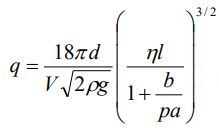
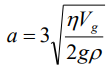

In [90]:
andmed = {
    "A": [
        {"katse": 3, "V": -64.00, "t": 3.53},
        {"katse": 4, "V": -63.00, "t": 3.62},
        {"katse": 5, "V": -63.00, "t": 3.65},],
    "B": [
        {"katse": 1, "V": -37.00, "t": 4.39},
        {"katse": 2, "V": -37.00, "t": 4.38},
        {"katse": 3, "V": -37.00, "t": 4.32},],
    "C": [
        {"katse": 1, "V": -53.00, "t": 59.12},
        {"katse": 2, "V": -53.00, "t": 61.02},
        {"katse": 2, "V": -53.00, "t": 59.24},],
    "D": [
        {"katse": 1, "V": -63.00, "t": 3.84},
        {"katse": 2, "V": -63.00, "t": 3.85},
        {"katse": 3, "V": -63.00, "t": 3.85},],
    "E": [
        {"katse": 1, "V": -40.00, "t": 6.95},
        {"katse": 2, "V": -40.00, "t": 7.09},
        {"katse": 3, "V": -40.00, "t": 6.92},],
    "F": [
        {"katse": 1, "V": -42.00, "t": 12.66},
        {"katse": 2, "V": -42.00, "t": 12.60},
        {"katse": 3, "V": -42.00, "t": 12.61},],
    "G": [
        {"katse": 1, "V": -15.00, "t": 25.15},
        {"katse": 2, "V": -15.00, "t": 24.11},
        {"katse": 3, "V": -15.00, "t": 25.12},
        {"katse": 4, "V": -15.00, "t": 26.06},],
    "H": [
        {"katse": 1, "V": -48.00, "t": 10.92},
        {"katse": 2, "V": -48.00, "t": 11.13},
        {"katse": 3, "V": -48.00, "t": 10.88},],
    "I": [
        {"katse": 1, "V": -14.00, "t": 38.31},
        {"katse": 2, "V": -14.00, "t": 38.88},
        {"katse": 3, "V": -14.00, "t": 38.34},],
    "J": [
        {"katse": 1, "V": -55.00, "t": 10.14},
        {"katse": 2, "V": -55.00, "t": 10.09},
        {"katse": 3, "V": -55.00, "t": 10.12},],
    "K": [
        {"katse": 1, "V": -47.00, "t": 16.60},
        {"katse": 2, "V": -47.00, "t": 16.30},
        {"katse": 3, "V": -47.00, "t": 16.60},],
    "L": [
        {"katse": 1, "V": -18.00, "t": 25.18},
        {"katse": 2, "V": -18.00, "t": 26.58},
        {"katse": 3, "V": -18.00, "t": 27.00},
        {"katse": 4, "V": -18.00, "t": 26.61},],}

### Saadud väärtused

In [91]:
kirjed = []
for tilk, katsete_list in andmed.items():
    for m in katsete_list:
        a, q = arvuta_a_ja_q(m["V"], m["t"])
        kirjed.append({
            "tilk": tilk,
            "katse": int(m["katse"]),
            "V_tasakaal (V)": float(m["V"]),
            "t_kukkumine (s)": float(m["t"]),
            "a (m)": a,
            "q (C)": q})

df_mõõtmised = (
    pd.DataFrame(kirjed)
    .sort_values(["tilk", "katse"])
    .reset_index(drop=True))

df_mõõtmised

,tilk,katse,V_tasakaal (V),t_kukkumine (s),a (m),q (C)
0,A,3,-64.0,3.53,1.907843e-06,2.052363e-17
1,A,4,-63.0,3.62,1.883977e-06,2.006116e-17
2,A,5,-63.0,3.65,1.876219e-06,1.980927e-17
3,B,1,-37.0,4.39,1.710794e-06,2.541806e-17
4,B,2,-37.0,4.38,1.712745e-06,2.550713e-17
5,B,3,-37.0,4.32,1.724599e-06,2.605252e-17
6,C,1,-53.0,59.12,4.661897e-07,3.025406e-19
7,C,2,-53.0,61.02,4.588744e-07,2.875005e-19
8,C,2,-53.0,59.24,4.657173e-07,3.015538e-19
9,D,1,-63.0,3.84,1.829213e-06,1.832808e-17


In [92]:
df_tilgad = (
    df_mõõtmised.groupby("tilk")
    .agg(
        katseid=("q (C)", "size"),
        q_keskmine=("q (C)", "mean"),
        q_hajuvus=("q (C)", "std"),
        a_keskmine=("a (m)", "mean"),)
    .reset_index())

df_tilgad

,tilk,katseid,q_keskmine,q_hajuvus,a_keskmine
0,A,3,2.013135e-17,3.623183e-19,1.889346e-06
1,B,3,2.565924e-17,3.434957e-19,1.716046e-06
2,C,3,2.971983e-19,8.413042e-21,4.635938e-07
3,D,3,1.827949e-17,4.207493e-20,1.827628e-06
4,E,3,1.150792e-17,2.286055e-19,1.356167e-06
5,F,3,4.383472e-18,1.733847e-20,1.008889e-06
6,G,4,4.188079e-18,2.105648e-19,7.155334e-07
7,H,3,4.767007e-18,8.980449e-20,1.081959e-06
8,I,3,2.275751e-18,3.000266e-20,5.776312e-07
9,J,3,4.720771e-18,1.821810e-20,1.126969e-06


### Siin leian parimad , mille q/e on kõige lähimal täisarvulisele n väärtusele

In [93]:
e_kandidaadid = np.linspace(1.3e-19, 1.9e-19, 2001)

qv = df_tilgad["q_keskmine"].values

def hinne(e):
    n = np.round(qv / e)
    n[n < 1] = 1
    suht_viga = np.abs(qv - n * e) / qv
    return suht_viga.mean()

hinded = np.array([hinne(e) for e in e_kandidaadid])
e_parim = e_kandidaadid[np.argmin(hinded)]
e_parim

np.float64(1.5172e-19)

In [94]:
df_tulemus = df_tilgad.copy()
df_tulemus["n"] = np.round(df_tulemus["q_keskmine"] / e_parim).astype(int)
df_tulemus.loc[df_tulemus["n"] < 1, "n"] = 1
df_tulemus["e_i (C)"] = df_tulemus["q_keskmine"] / df_tulemus["n"]

e_keskmine = df_tulemus["e_i (C)"].mean()
e_std = df_tulemus["e_i (C)"].std()

df_tulemus, e_keskmine, e_std

(   tilk  katseid    q_keskmine     q_hajuvus    a_keskmine    n       e_i (C)
 0     A        3  2.013135e-17  3.623183e-19  1.889346e-06  133  1.513636e-19
 1     B        3  2.565924e-17  3.434957e-19  1.716046e-06  169  1.518298e-19
 2     C        3  2.971983e-19  8.413042e-21  4.635938e-07    2  1.485992e-19
 3     D        3  1.827949e-17  4.207493e-20  1.827628e-06  120  1.523291e-19
 4     E        3  1.150792e-17  2.286055e-19  1.356167e-06   76  1.514200e-19
 5     F        3  4.383472e-18  1.733847e-20  1.008889e-06   29  1.511542e-19
 6     G        4  4.188079e-18  2.105648e-19  7.155334e-07   28  1.495742e-19
 7     H        3  4.767007e-18  8.980449e-20  1.081959e-06   31  1.537744e-19
 8     I        3  2.275751e-18  3.000266e-20  5.776312e-07   15  1.517168e-19
 9     J        3  4.720771e-18  1.821810e-20  1.126969e-06   31  1.522829e-19
 10    K        3  2.580180e-18  4.266598e-20  8.824700e-07   17  1.517753e-19
 11    L        4  3.235702e-18  1.598320e-19  6.985

### Koostasin graafiku laengu sõltuvusest laengute arvust ning leidsin sirge võrrandi. Võrrandi tõus annabki elementaarlaengu väärtuse, eelnevalt ümardasin ka laengu täisarvudeks

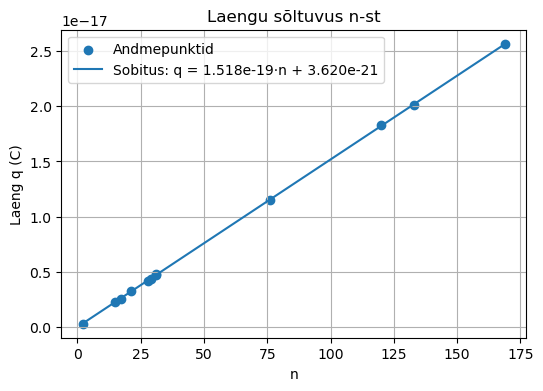

Sirge võrrand: q = 1.517600e-19 * n + 3.619664e-21
Elementaarlaengu hinnang (sirge tõus): e ≈ 1.517600e-19 C


In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Võtame andmed sinu tabelist df_tulemus
n = df_tulemus["n"].to_numpy()
q = df_tulemus["q_keskmine"].to_numpy()

# Sobitame sirge: q = k*n + b
k, b = np.polyfit(n, q, 1)

# Teeme sobitusjoone jaoks sujuvad punktid
n_fit = np.linspace(n.min(), n.max(), 200)
q_fit = k * n_fit + b

# Joonistame graafiku
plt.figure(figsize=(6, 4))
plt.scatter(n, q, label="Andmepunktid")
plt.plot(n_fit, q_fit, label=f"Sobitus: q = {k:.3e}·n + {b:.3e}")
plt.xlabel("n")
plt.ylabel("Laeng q (C)")
plt.title("Laengu sõltuvus n-st")
plt.grid(True)
plt.legend()
plt.show()

print(f"Sirge võrrand: q = {k:.6e} * n + {b:.6e}")
print(f"Elementaarlaengu hinnang (sirge tõus): e ≈ {k:.6e} C")

### Sirge tõusult näeme, et saadud elementaarlaeng on veidi väiksem, kui see, mis ta päriselt on (e=1,602176634 10^-19 C ). Küllap ei olnud mõõtmised kõige täpsemad või esines teisi segavaid faktoreid.
